In [1]:
 #importing the necessary libraries for analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Reading the data set into pandas.
data = pd.read_csv('Datasets/customer_booking_for_britishairways.csv' , encoding = "ISO-8859-1") 

In [3]:
# Describimg the data to know the range of values
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,7601.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000
mean,1.568083,98.183421,40.816842,8.999342,0.772895,0.307763,0.529605,7.926026,0.123947
std,0.950693,91.820501,40.930011,5.588972,0.418989,0.461598,0.499156,1.409640,0.329543
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,28.000000,21.000000,5.000000,1.000000,0.000000,0.000000,7.000000,0.000000
50%,1.000000,67.000000,28.000000,9.000000,1.000000,0.000000,1.000000,8.830000,0.000000
75%,2.000000,142.250000,42.000000,12.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,641.000000,603.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [4]:
# Accessing information about your data to know the data type and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7601 entries, 0 to 7600
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         7601 non-null   int64  
 1   sales_channel          7600 non-null   object 
 2   trip_type              7600 non-null   object 
 3   purchase_lead          7600 non-null   float64
 4   length_of_stay         7600 non-null   float64
 5   flight_hour            7600 non-null   float64
 6   flight_day             7600 non-null   object 
 7   route                  7600 non-null   object 
 8   booking_origin         7600 non-null   object 
 9   wants_extra_baggage    7600 non-null   float64
 10  wants_preferred_seat   7600 non-null   float64
 11  wants_in_flight_meals  7600 non-null   float64
 12  flight_duration        7600 non-null   float64
 13  booking_complete       7600 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 831.5+ 

In [10]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0


In [13]:
# Checking for unique values in the columns
data.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            413
length_of_stay           242
flight_hour               24
flight_day                 7
route                    203
booking_origin            68
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [15]:
# Checking for null values in the data set 
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [16]:
#Confirming that each column is in the right data type
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead            float64
length_of_stay           float64
flight_hour              float64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage      float64
wants_preferred_seat     float64
wants_in_flight_meals    float64
flight_duration          float64
booking_complete         float64
dtype: object

In [17]:
# Checking the shape of the data set.
data.shape

(7600, 14)

## Analysis 
### 1. Evaluating Sales Channel Performance via Non-linear Booking Trends
•
Objective: Analyze the interplay between sales channel effectiveness and the distribution of booking completion rates across varying lead times. Explore whether certain channels demonstrate non-linear trends where longer lead times unexpectedly increase completion rates, deviating from conventional patterns.

In [18]:
#Identifying the different sales channels
data['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [28]:
#Identifying the booking completion values
data['booking_complete'].unique()

array([0., 1.])

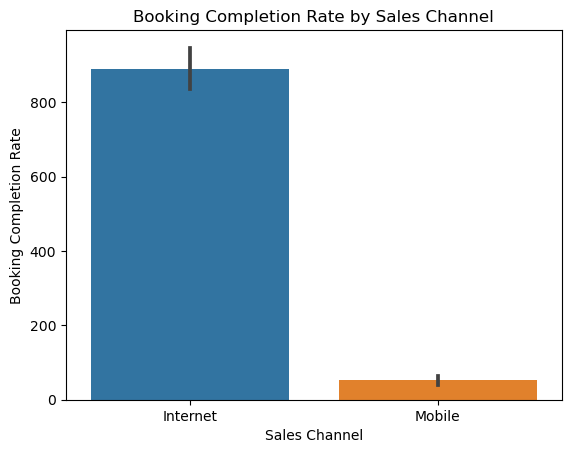

In [29]:
# Bar plot with proper labels to analyze the distribution of booking completion rates over varying sales channels
sns.barplot(x='sales_channel', y='booking_complete', data=data, estimator=sum)
plt.title("Booking Completion Rate by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Booking Completion Rate")
plt.savefig('booking_completion_by_sales_channel.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Create a lead time category (grouping for better visualization)
data['lead_time_category'] = pd.cut(data['purchase_lead'], bins=[0, 7, 30, 60, 120, np.inf], 
                                  labels=['0-7 days', '8-30 days', '31-60 days', '61-120 days', '120+ days'])

In [23]:
# Compute booking completion rate for each sales channel & lead time category
completion_rates = data.groupby(['sales_channel', 'lead_time_category'])['booking_complete'].mean().reset_index()

# Pivot the data for heatmap visualization
completion_pivot = completion_rates.pivot(index='sales_channel', columns='lead_time_category', values='booking_complete')

C:\Users\user\AppData\Local\Temp\ipykernel_20688\976169124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  completion_rates = data.groupby(['sales_channel', 'lead_time_category'])['booking_complete'].mean().reset_index()


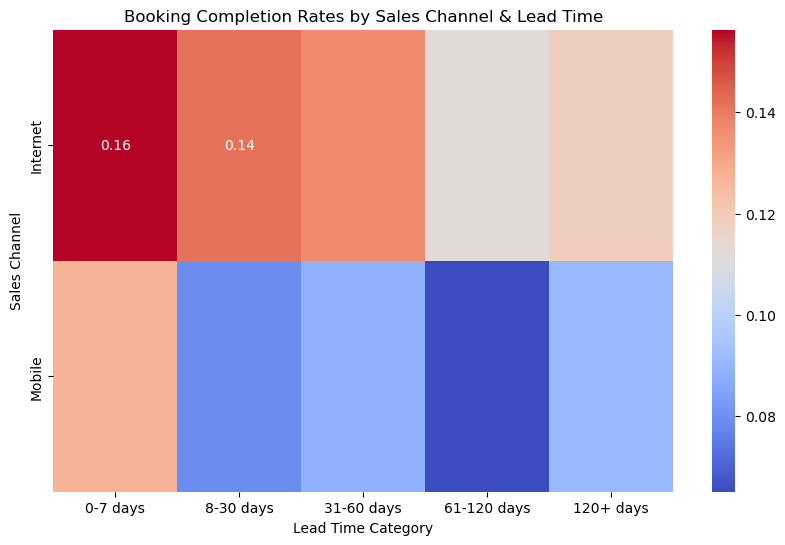

In [24]:
# Plot a heatmap to show booking completion rates by sales channel and lead time
plt.figure(figsize=(10, 6))
sns.heatmap(completion_pivot, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Booking Completion Rates by Sales Channel & Lead Time")
plt.xlabel("Lead Time Category")
plt.ylabel("Sales Channel")
plt.savefig("Sales_Channel_Booking_Heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


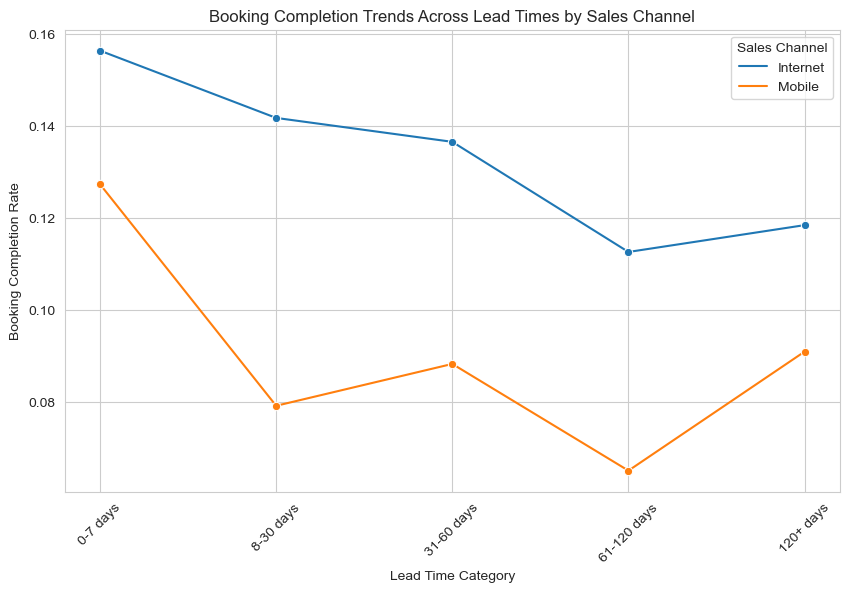

In [48]:
# Line plot to observe trends
plt.figure(figsize=(10, 6))

# Plot for each sales channel
sns.lineplot(data=completion_rates, x="lead_time_category", y="booking_complete", hue="sales_channel", marker="o")

plt.title("Booking Completion Trends Across Lead Times by Sales Channel")
plt.xlabel("Lead Time Category")
plt.ylabel("Booking Completion Rate")
plt.xticks(rotation=45)
plt.legend(title="Sales Channel")
plt.grid(True)
plt.savefig("Sales_Channel_Booking_Trend.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


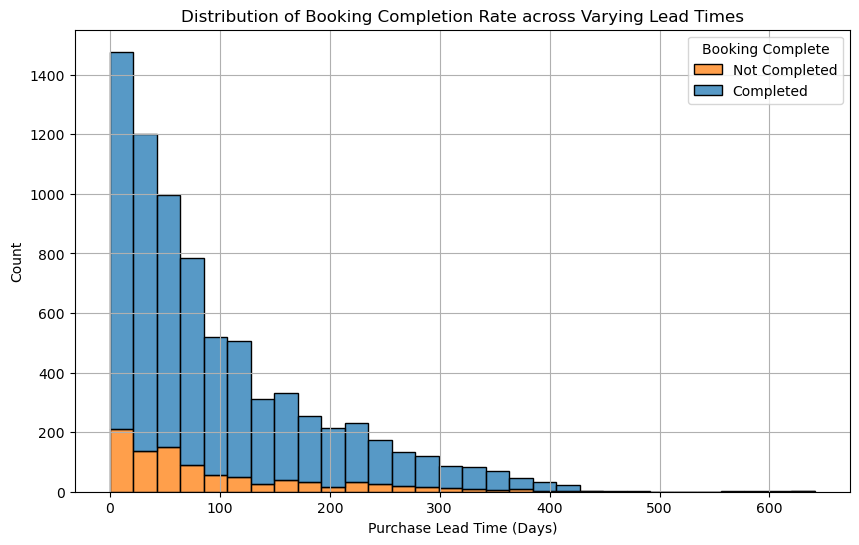

In [34]:

#Analysing the Distribution Completion Rate Across Varying Lead Times
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='purchase_lead', hue='booking_complete', multiple='stack', bins=30)
plt.title('Distribution of Booking Completion Rate across Varying Lead Times')
plt.xlabel('Purchase Lead Time (Days)')
plt.ylabel('Count')
plt.legend(title='Booking Complete', labels=['Not Completed', 'Completed'])
plt.grid(True)
plt.savefig('Distribution_of_Booking_Completion_Rate.png', dpi=300, bbox_inches='tight')
plt.show()


In [35]:
dts = data.groupby(['sales_channel', 'purchase_lead'])['booking_complete']
dts

##  Explore whether certain channels demonstrate non-linear trends where longer lead times unexpectedly increase completion rates, deviating from conventional patterns.

In [38]:

# Create a new column for non-linear trend analysis
data['purchase_lead_squared'] = data['purchase_lead'] ** 2

# Group data by sales channel and lead time
grouped_data = data.groupby(['sales_channel', 'purchase_lead']).agg({
    'booking_complete': ['mean', 'std']
}).reset_index()

# Rename columns for easier access
grouped_data.columns = ['sales_channel', 'purchase_lead', 'mean_completion_rate', 'std_completion_rate']

print(grouped_data.head())


  sales_channel  purchase_lead  mean_completion_rate  std_completion_rate
0      Internet            0.0              0.047619             0.218218
1      Internet            1.0              0.127660             0.337318
2      Internet            2.0              0.121622             0.329079
3      Internet            3.0              0.212121             0.411943
4      Internet            4.0              0.102941             0.306141


# 2. Hidden Patterns in Route Popularity and Service Add-ons
### Objective: Investigate if the popularity of a route correlates with distinct preferences for specific service add-ons (e.g., baggage, meals, or seating). Assess whether the relative demand for add-ons shifts significantly between high-frequency routes and low-frequency routes, accounting for route-specific customer demographics.

In [40]:
data.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_squared
0,2,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0,68644.0
1,1,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0,12544.0
2,2,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0,59049.0
3,1,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0,9216.0
4,2,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0,4624.0


In [41]:
data['route'].nunique()

203

In [42]:
data['booking_origin'].nunique

<bound method IndexOpsMixin.nunique of 0       New Zealand
1       New Zealand
2             India
3       New Zealand
4             India
           ...     
7595       Malaysia
7596       Malaysia
7597      Singapore
7598      Singapore
7599      Singapore
Name: booking_origin, Length: 7600, dtype: object>

In [43]:
service_adons = data.groupby(['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']).size().reset_index(name='count')
service_adons.head(5)

,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,count
0,0.0,0.0,0.0,1130
1,0.0,0.0,1.0,406
2,0.0,1.0,0.0,106
3,0.0,1.0,1.0,84
4,1.0,0.0,0.0,1936


In [29]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_squared
0,2,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0,68644.0
1,1,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0,12544.0
2,2,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0,59049.0
3,1,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0,9216.0
4,2,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0,4624.0


In [30]:
# Calculate route popularity
route_popularity = data.groupby('route')['booking_origin'].count().reset_index()
route_popularity.columns = ['route', 'num_bookings']

# Merge route popularity with the original data
data = pd.merge(data, route_popularity, on='route')

print(data.head())


   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip          262.0            19.0   
1               1      Internet  RoundTrip          112.0            20.0   
2               2      Internet  RoundTrip          243.0            22.0   
3               1      Internet  RoundTrip           96.0            31.0   
4               2      Internet  RoundTrip           68.0            22.0   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0          7.0        Sat  AKLDEL    New Zealand                  1.0   
1          3.0        Sat  AKLDEL    New Zealand                  0.0   
2         17.0        Wed  AKLDEL          India                  1.0   
3          4.0        Sat  AKLDEL    New Zealand                  0.0   
4         15.0        Wed  AKLDEL          India                  1.0   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                   0.0        

In [31]:
# Group data by route popularity and service add-ons
grouped_data = data.groupby(['num_bookings', 'wants_extra_baggage']).agg({
    'booking_origin': 'count'
}).reset_index()

# Calculate the relative demand for each service add-on(wants_extra_baggage)
grouped_data['relative_demand'] = grouped_data.groupby('num_bookings')['booking_origin'].transform(lambda x: x / x.sum())

print(grouped_data.head())


   num_bookings  wants_extra_baggage  booking_origin  relative_demand
0             1                  0.0               4         0.148148
1             1                  1.0              23         0.851852
2             2                  0.0              11         0.343750
3             2                  1.0              21         0.656250
4             3                  0.0               6         0.125000


In [32]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_squared,num_bookings
0,2,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0,68644.0,19
1,1,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0,12544.0,19
2,2,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0,59049.0,19
3,1,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0,9216.0,19
4,2,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0,4624.0,19


In [33]:
#Determine route popularity (count of bookings per route)
route_popularity = data['route'].value_counts().reset_index()
route_popularity.columns = ['route', 'route_popularity']

# Merge route popularity with the main dataset
data_merged = data.merge(route_popularity, on='route', how='left')

In [34]:
#  Compute correlation coefficients
correlation_results = data_merged[['route_popularity', 'wants_extra_baggage', 
                                 'wants_preferred_seat', 'wants_in_flight_meals']].corr()
print("Correlation Results:")
print(correlation_results)

Correlation Results:
                       route_popularity  wants_extra_baggage  \
route_popularity               1.000000            -0.074983   
wants_extra_baggage           -0.074983             1.000000   
wants_preferred_seat          -0.095406             0.232159   
wants_in_flight_meals         -0.080738             0.266853   

                       wants_preferred_seat  wants_in_flight_meals  
route_popularity                  -0.095406              -0.080738  
wants_extra_baggage                0.232159               0.266853  
wants_preferred_seat               1.000000               0.337689  
wants_in_flight_meals              0.337689               1.000000  


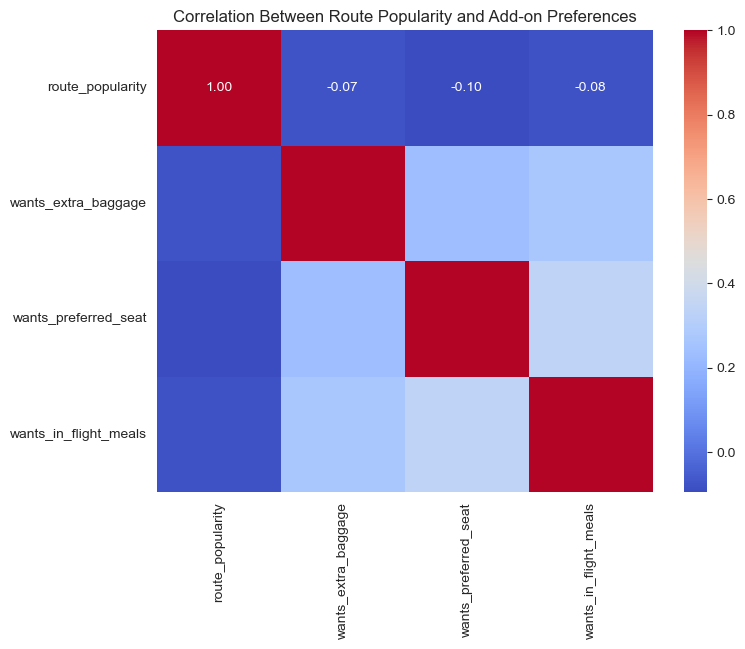

In [35]:
#Visualize correlation results with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Route Popularity and Add-on Preferences")
plt.savefig('Correlation plot.png', dpi=300, bbox_inches='tight')
plt.show()

## Assessing whether the relative demand for add-ons shifts significantly between high-frequency routes and low-frequency routes, accounting for route-specific customer demographics.

In [40]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_squared,num_bookings
0,2,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0,68644.0,19
1,1,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0,12544.0,19
2,2,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0,59049.0,19
3,1,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0,9216.0,19
4,2,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0,4624.0,19


In [41]:
route_popularity = data.groupby('route').size().reset_index(name='booking_count')

# Sort routes by popularity
route_popularity = route_popularity.sort_values(by='booking_count', ascending=False)
route_popularity

,route,booking_count
6,AKLKUL,2061
163,COKSYD,434
137,CMBMEL,425
159,COKMEL,419
161,COKPER,272
...,...,...
17,BBIPER,1
177,CTSLGK,1
179,CTSMYY,1
102,CGKMRU,1


In [26]:
# Define high-frequency and low-frequency routes based on median booking count
route_counts = data['route'].value_counts()
median_bookings = route_counts.median()

# Classify routes
data['route_frequency'] = data['route'].apply(lambda x: 'High-Frequency' if route_counts[x] >= median_bookings else 'Low-Frequency')

# Check classification
print(data['route_frequency'].value_counts())

route_frequency
High-Frequency    7260
Low-Frequency      340
Name: count, dtype: int64


In [ ]:
## Determine the threshold for high and low-frequency routes
high_freq_threshold = route_analysis['booking_count'].quantile(0.75)
low_freq_threshold = route_analysis['booking_count'].quantile(0.25)

# Filter high-frequency and low-frequency routes
high_freq_routes = route_analysis[route_analysis['booking_count'] >= high_freq_threshold]
low_freq_routes = route_analysis[route_analysis['booking_count'] <= low_freq_threshold]

# Calculate the average add-on percentages for high and low-frequency routes
high_freq_add_ons = high_freq_routes[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].mean()
low_freq_add_ons = low_freq_routes[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].mean()

# Display the results
print("Average add-on percentages for high-frequency routes:")
print(high_freq_add_ons)

print("\nAverage add-on percentages for low-frequency routes:")
print(low_freq_add_ons)## Determine the threshold for high and low-frequency routes
high_freq_threshold = route_analysis['booking_count'].quantile(0.75)
low_freq_threshold = route_analysis['booking_count'].quantile(0.25)

# Filter high-frequency and low-frequency routes
high_freq_routes = route_analysis[route_analysis['booking_count'] >= high_freq_threshold]
low_freq_routes = route_analysis[route_analysis['booking_count'] <= low_freq_threshold]

# Calculate the average add-on percentages for high and low-frequency routes
high_freq_add_ons = high_freq_routes[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].mean()
low_freq_add_ons = low_freq_routes[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].mean()

# Display the results
print("Average add-on percentages for high-frequency routes:")
print(high_freq_add_ons)

print("\nAverage add-on percentages for low-frequency routes:")
print(low_freq_add_ons)

In [27]:
# Aggregate add-on preferences by route frequency
addon_demand = data.groupby('route_frequency')[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].mean() * 100

# Display results
print(addon_demand)

                 wants_extra_baggage  wants_preferred_seat  \
route_frequency                                              
High-Frequency             77.231405             31.143251   
Low-Frequency              78.529412             22.941176   

                 wants_in_flight_meals  
route_frequency                         
High-Frequency               53.388430  
Low-Frequency                43.823529  


<Figure size 1000x600 with 0 Axes>

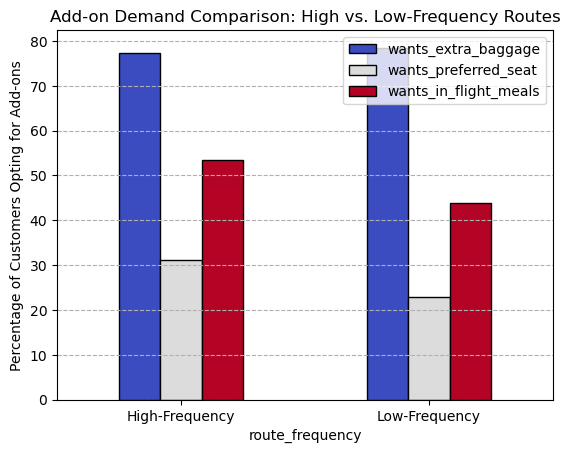

In [28]:
# Plot bar chart
plt.figure(figsize=(10, 6))
addon_demand.plot(kind='bar', colormap='coolwarm', edgecolor='black')

# Labels and title
plt.title("Add-on Demand Comparison: High vs. Low-Frequency Routes")
plt.ylabel("Percentage of Customers Opting for Add-ons")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Save and show plot
plt.savefig("Add-on_Demand_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


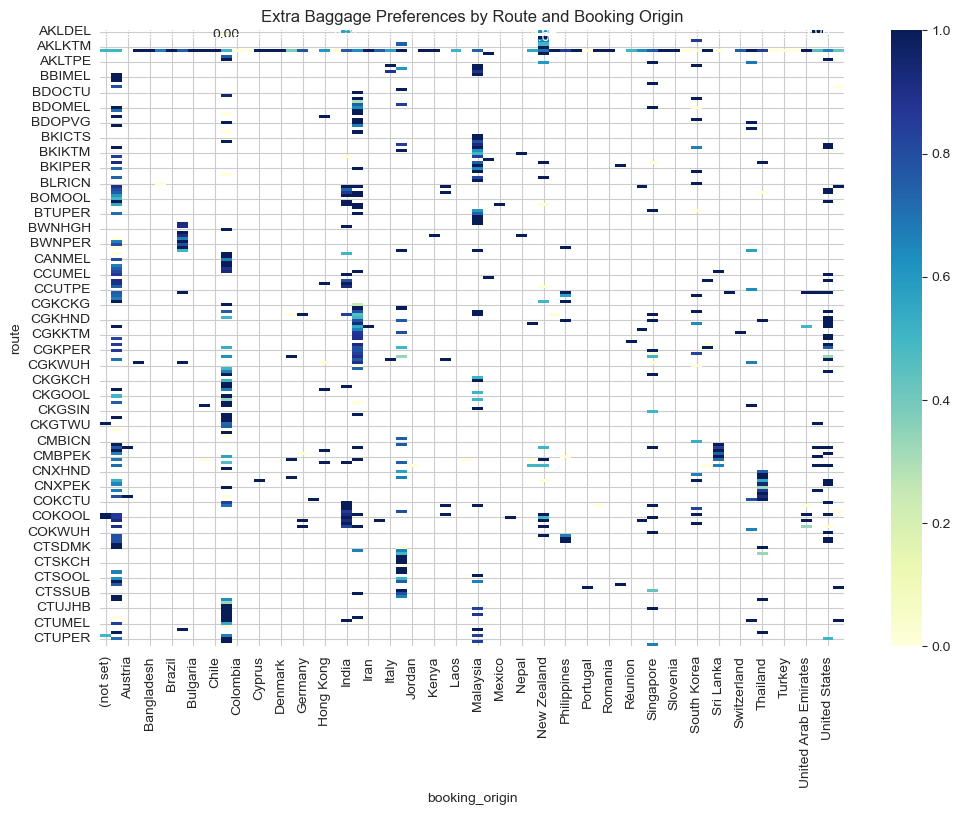

In [46]:
# Create a pivot table for add-on preferences by route and booking origin(as booking origin is the cusomer demography)
pivot_table = data.pivot_table(index='route', columns='booking_origin', values='wants_extra_baggage', aggfunc='mean')

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Extra Baggage Preferences by Route and Booking Origin')
plt.savefig('Correlation Between Route Popularity and wants_extra_baggage.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


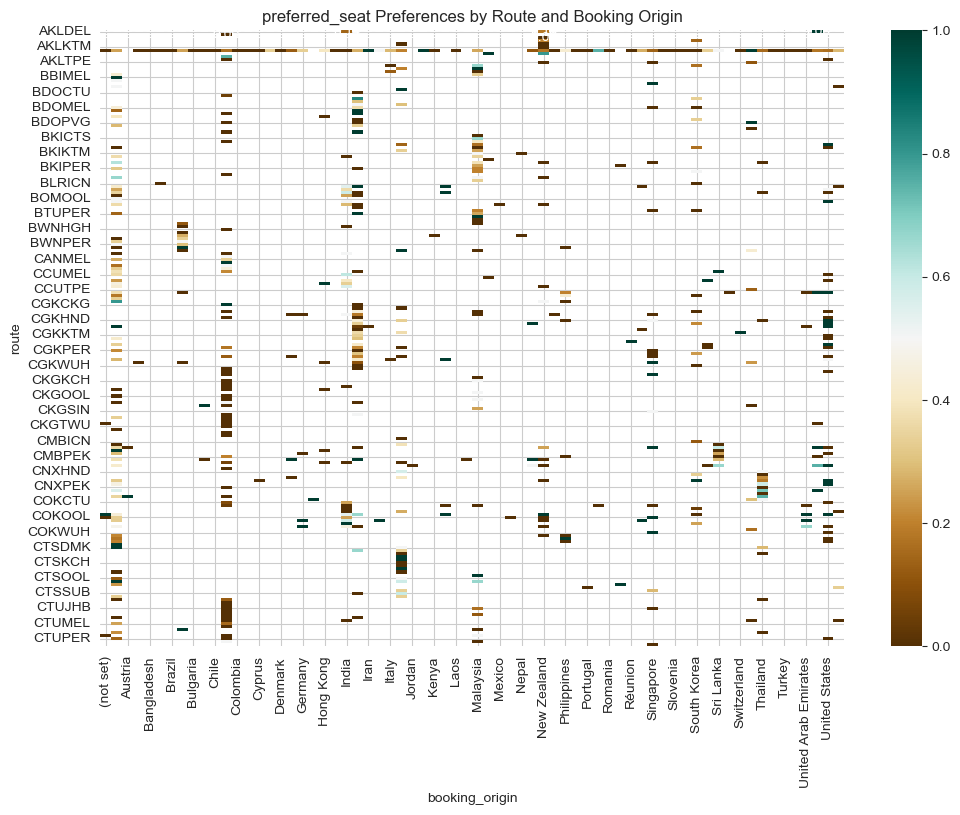

In [47]:
pivot_table = data.pivot_table(index='route', columns='booking_origin', values='wants_preferred_seat', aggfunc='mean')

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='BrBG', annot=True, fmt=".2f")
plt.title('preferred_seat Preferences by Route and Booking Origin')
plt.savefig('Correlation Between Route Popularity and wants_preferred_seat.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


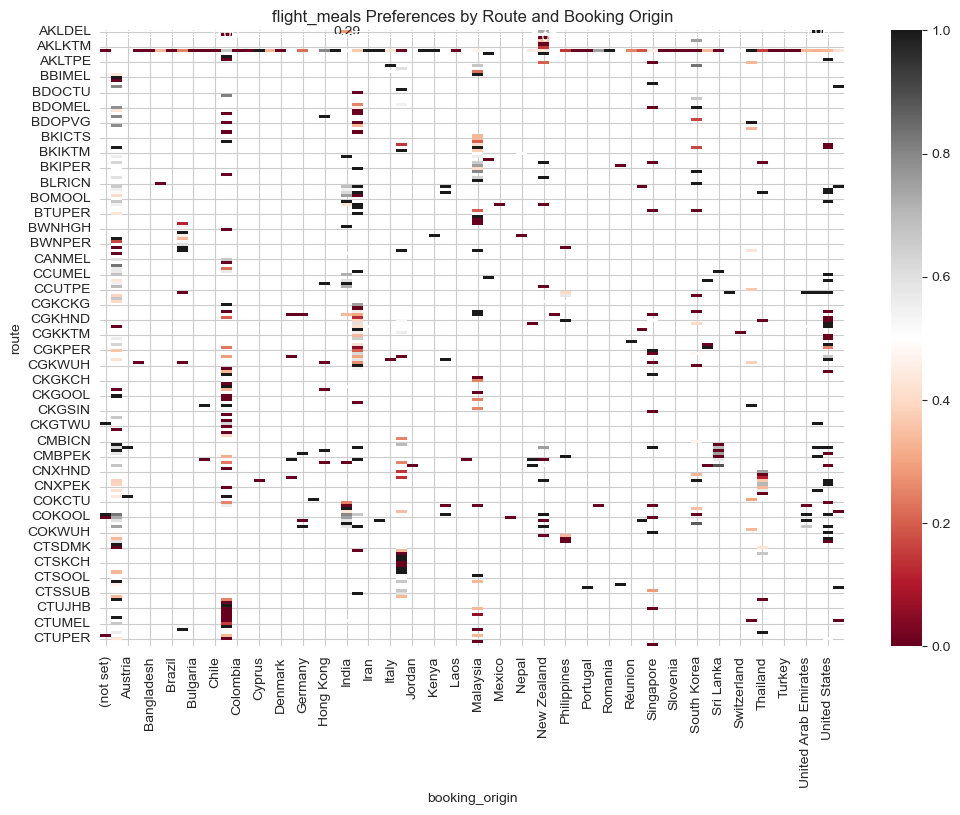

In [48]:
pivot_table = data.pivot_table(index='route', columns='booking_origin', values='wants_in_flight_meals', aggfunc='mean')

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='RdGy', annot=True, fmt=".2f")
plt.title('flight_meals Preferences by Route and Booking Origin')
plt.savefig('Correlation Between Route Popularity and wants_in_flight_meals.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Complex Temporal Dynamics of Bookings and Departure Characteristics•## 
Objective: Explore how flight departure day interacts with other temporal features, such as departure hour and lead time, to influence booking volumes. Identify anomalies where low-frequency booking days exhibit disproportionately high correlations with specific departure times or lead time ranges, suggesting niche customer behavior.

In [49]:
data.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_squared,num_bookings,route_frequency
0,2,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0,68644.0,19,High-Frequency
1,1,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0,12544.0,19,High-Frequency
2,2,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0,59049.0,19,High-Frequency
3,1,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0,9216.0,19,High-Frequency
4,2,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0,4624.0,19,High-Frequency


In [50]:
# Group data by departure day, departure hour, and lead time
grouped_data = data.groupby(['flight_day', 'flight_hour', 'purchase_lead']).agg({
    'sales_channel': 'count'
}).reset_index()

# Rename sales_channelcolumns for easier access
grouped_data.columns = ['flight_day', 'flight_hour', 'purchase_lead', 'booking_volume']

print(grouped_data.head())


  flight_day  flight_hour  purchase_lead  booking_volume
0        Fri          0.0            5.0               1
1        Fri          0.0            6.0               1
2        Fri          0.0           16.0               1
3        Fri          0.0           18.0               2
4        Fri          0.0           29.0               1


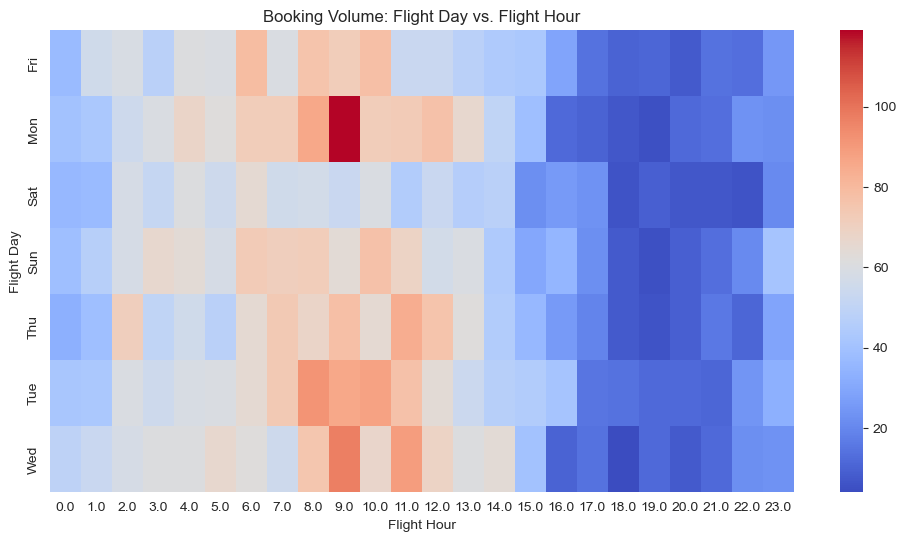

In [51]:
# Aggregate booking volumes by flight day and hour
booking_trends = data.groupby(['flight_day', 'flight_hour']).size().unstack()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(booking_trends, cmap="coolwarm", annot=False)
plt.title("Booking Volume: Flight Day vs. Flight Hour")
plt.xlabel("Flight Hour")
plt.ylabel("Flight Day")
plt.xticks(rotation=0)

# Save and show heatmap
plt.savefig("Booking_FlightDay_Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


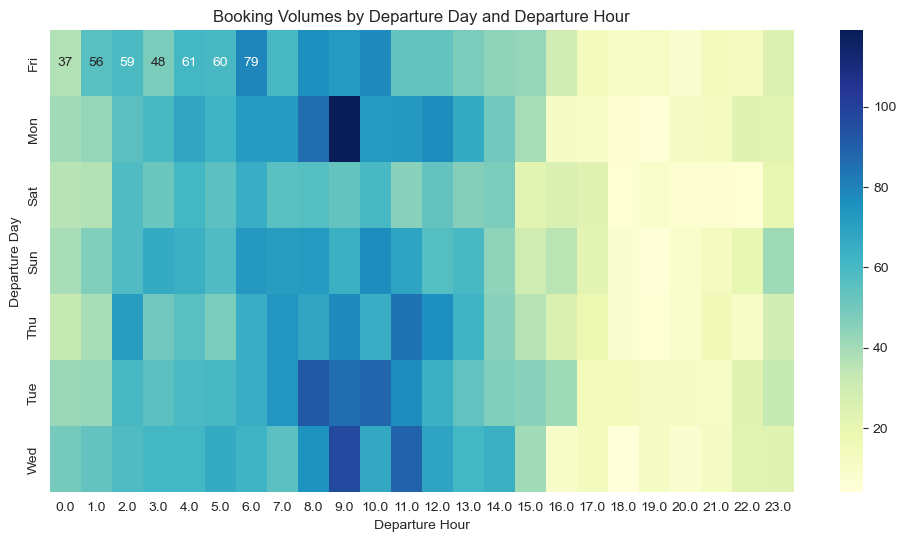

In [52]:
sns.set_style("whitegrid")

# Create a heatmap for booking volumes by departure day and departure hour
plt.figure(figsize=(12, 6))
heatmap_data = grouped_data.pivot_table(index='flight_day', columns='flight_hour', values='booking_volume', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Booking Volumes by Departure Day and Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Departure Day')
plt.savefig('Booking Volumes by Departure Day and Departure Hour.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


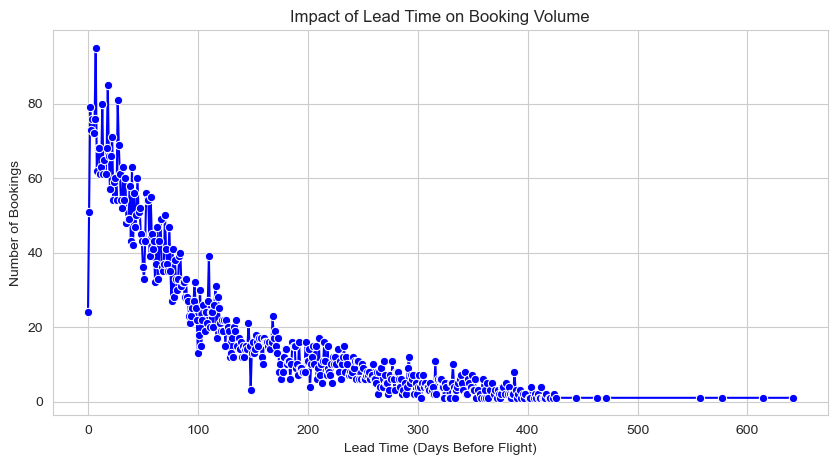

In [53]:
# Aggregate booking volume by purchase lead time
lead_time_bookings = data.groupby('purchase_lead').size()

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=lead_time_bookings.index, y=lead_time_bookings.values, marker='o', color="blue")
plt.title("Impact of Lead Time on Booking Volume")
plt.xlabel("Lead Time (Days Before Flight)")
plt.ylabel("Number of Bookings")
plt.grid(True)

# Save and show plot
plt.show()

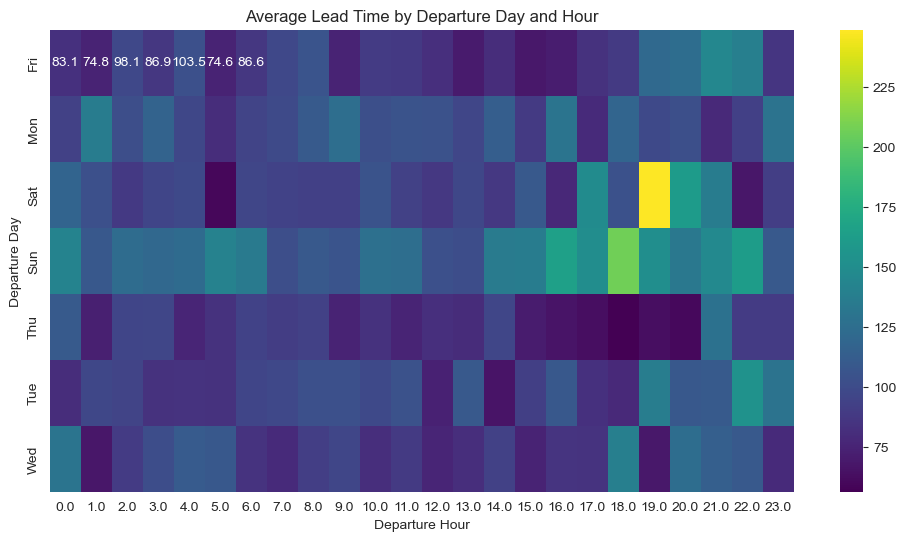

In [54]:
# Create a pivot table to analyze the relationship between departure day, hour, and lead time
pivot_table = data.pivot_table(index='flight_day', columns='flight_hour', values='purchase_lead', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".1f")
plt.title('Average Lead Time by Departure Day and Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Departure Day')
plt.savefig('average lead time Departure hour and day.png', dpi=300, bbox_inches='tight')
plt.show()

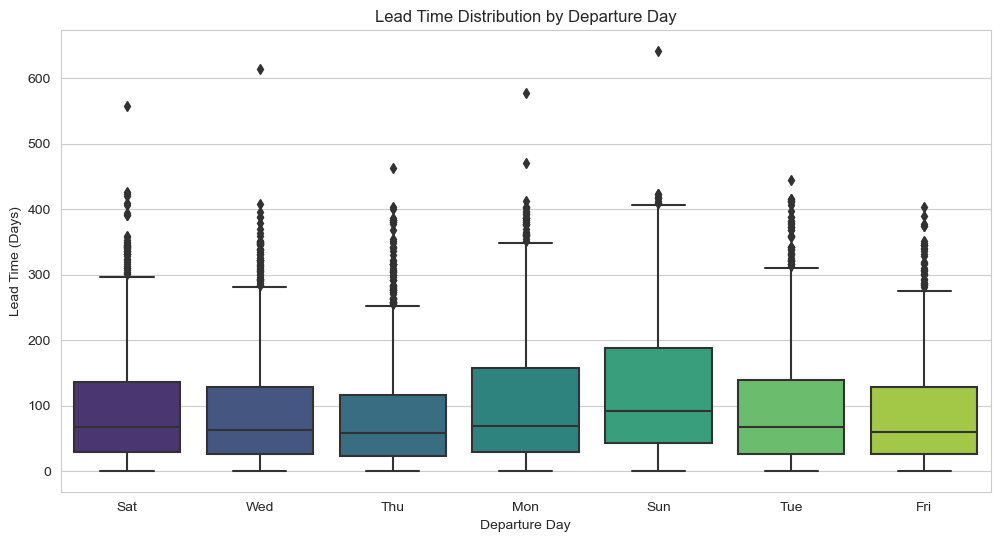

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='flight_day', y='purchase_lead', data=data, palette='viridis')
plt.title('Lead Time Distribution by Departure Day')
plt.xlabel('Departure Day')
plt.ylabel('Lead Time (Days)')
plt.savefig('Lead Time Distribution by Departure Day.png', dpi=300, bbox_inches='tight')
plt.show()

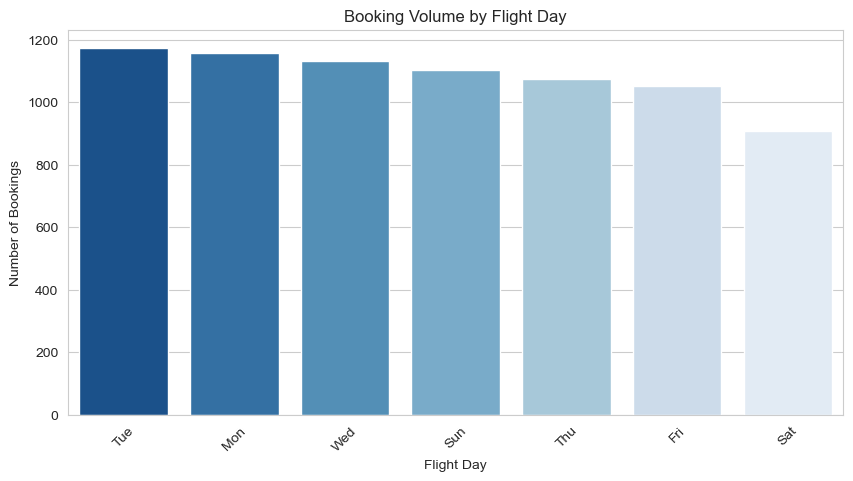

In [54]:
# Count booking volume by flight day
flight_day_counts = data['flight_day'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=flight_day_counts.index, y=flight_day_counts.values, palette="Blues_r")
plt.title("Booking Volume by Flight Day")
plt.xlabel("Flight Day")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

# Save and show plot
plt.savefig("Booking Volume by Flight Day.png", dpi=300, bbox_inches="tight")
plt.show()

In [53]:
# Create a line plot for booking volumes by lead time
with pd.option_context('mode.use_inf_as_na', True):
    plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='purchase_lead', y='booking_volume', hue='flight_day')
    

# Add titles and labels
plt.title('Booking Volumes by Lead Time and Departure Day')
plt.xlabel('Lead Time (days)')
plt.ylabel('Booking Volume')
plt.savefig('Booking Volumes by Lead Time and Departure Day.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15472\1249538740.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: Could not interpret value `booking_volume` for parameter `y`

<Figure size 1200x600 with 0 Axes>

In [60]:
# Calculate the median booking volume for each departure day
median_booking_volume = grouped_data.groupby('flight_day')['booking_volume'].median().reset_index()
median_booking_volume.columns = ['flight_day', 'median_booking_volume']

# Merge median booking volume with the grouped data
grouped_data = pd.merge(grouped_data, median_booking_volume, on='flight_day')

# Identify anomalies where booking volume is significantly higher than the median
grouped_data['anomaly'] = np.where(grouped_data['booking_volume'] > 1.5 * grouped_data['median_booking_volume'], True, False)

# Filter anomalies for low-frequency booking days
low_frequency_anomalies = grouped_data[(grouped_data['anomaly'] == True) & (grouped_data['booking_volume'] < grouped_data['median_booking_volume'])]

print(low_frequency_anomalies)

Empty DataFrame
Columns: [flight_day, flight_hour, purchase_lead, booking_volume, median_booking_volume, anomaly]
Index: []


In [62]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'purchase_lead_squared', 'num_bookings', 'route_frequency'],
      dtype='object')

In [63]:
from scipy.stats import zscore
# Convert categorical columns if necessary
data['flight_day'] = data['flight_day'].astype(str)
data['flight_hour'] = pd.to_numeric(data['flight_hour'], errors='coerce')
data['purchase_lead'] = pd.to_numeric(data['purchase_lead'], errors='coerce')

# Aggregate bookings by flight day, flight hour, and lead time
booking_counts = data.groupby(['flight_day', 'flight_hour', 'purchase_lead'])['booking_complete'].count().reset_index()
booking_counts.rename(columns={'booking_complete': 'booking_volume'}, inplace=True)

# Compute Z-score to detect anomalies
booking_counts['z_score'] = zscore(booking_counts['booking_volume'])

In [64]:
# Define anomaly threshold (z-score > 2.5)
anomaly_threshold = 2.5
anomalies = booking_counts[booking_counts['z_score'] > anomaly_threshold]

# Display detected anomalies
print("Detected Anomalies in Booking Data:")
print(anomalies)

Detected Anomalies in Booking Data:
     flight_day  flight_hour  purchase_lead  booking_volume   z_score
38          Fri          1.0           10.0               3  3.935966
145         Fri          3.0           49.0               3  3.935966
179         Fri          4.0           24.0               3  3.935966
291         Fri          6.0           34.0               3  3.935966
405         Fri          8.0           35.0               3  3.935966
...         ...          ...            ...             ...       ...
6139        Wed         11.0           65.0               3  3.935966
6203        Wed         12.0           58.0               3  3.935966
6297        Wed         14.0           29.0               3  3.935966
6309        Wed         14.0           63.0               3  3.935966
6342        Wed         15.0           17.0               3  3.935966

[160 rows x 5 columns]


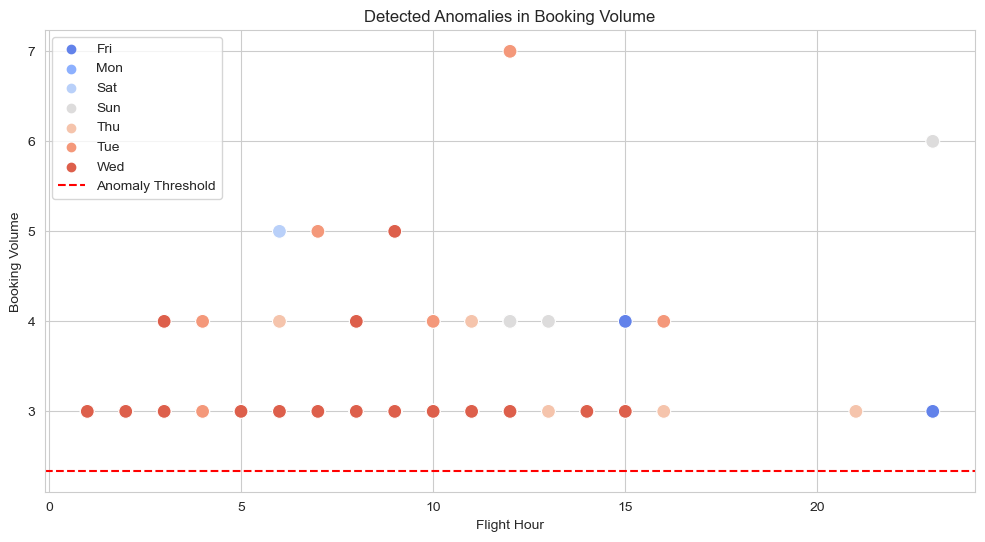

In [65]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=anomalies, x='flight_hour', y='booking_volume', hue='flight_day', palette='coolwarm', s=100)
plt.axhline(y=booking_counts['booking_volume'].mean() + anomaly_threshold * booking_counts['booking_volume'].std(),
                color='red', linestyle='dashed', label="Anomaly Threshold")
plt.title("Detected Anomalies in Booking Volume")
plt.xlabel("Flight Hour")
plt.ylabel("Booking Volume")
plt.legend()
plt.savefig("Booking_Volume_Anomaly_Scatter.png", dpi=300, bbox_inches="tight")
plt.show()

In [66]:
## THIS IS TO SAY THERE ARE NO ANOMALITIES IN THE BOOKING DAYS

# 4. T-Test: Dissecting Trip Type Preferences by Stay Duration Thresholds
## 
Objective: Assess whether Round Trips and One-Way trips exhibit fundamentally different patterns in stay durations when segmented by thresholds (e.g., trips shorter than 3 days versus trips longer than 14 days).
•
Hypothesis:
o
H0H_0H0: The mean length of stay for short trips (less than 3 days) is the same for Round Trips and One-Way Trips, and similarly for long trips (more than 14 days).
o
H1H_1H1: At least one trip type shows a significantly different mean length of stay across the thresholds.

In [ ]:
data.head()

In [ ]:
import scipy.stats as stats
# Filter data based on trip type and stay duration thresholds
short_trips = data[data['length_of_stay'] < 3]
long_trips = data[data['length_of_stay'] > 14]

# Separate by trip type
short_round = short_trips[short_trips['trip_type'] == 'Round Trip']['length_of_stay']
short_oneway = short_trips[short_trips['trip_type'] == 'One-Way']['length_of_stay']

long_round = long_trips[long_trips['trip_type'] == 'Round Trip']['length_of_stay']
long_oneway = long_trips[long_trips['trip_type'] == 'One-Way']['length_of_stay']

# Perform t-tests
short_trip_ttest = stats.ttest_ind(short_round, short_oneway, equal_var=False, nan_policy='omit')
long_trip_ttest = stats.ttest_ind(long_round, long_oneway, equal_var=False, nan_policy='omit')

# Print results
print(f"Short Trip T-test: p-value = {short_trip_ttest.pvalue:.5f}")
print(f"Long Trip T-test: p-value = {long_trip_ttest.pvalue:.5f}")

# Visualization
plt.figure(figsize=(12, 6))



In [ ]:
# Boxplot of short trips
plt.subplot(1, 2, 1)
sns.boxplot(x='trip_type', y='length_of_stay', data=short_trips, palette=['blue', 'orange'])
plt.title('Length of Stay: Short Trips (<3 days)')

# Boxplot of long trips
plt.subplot(1, 2, 2)
sns.boxplot(x='trip_type', y='length_of_stay', data=long_trips, palette=['blue', 'orange'])
plt.title('Length of Stay: Long Trips (>14 days)')

plt.tight_layout()
plt.savefig("Stay_Duration_Comparison.png", dpi=300)
plt.show()


## 5. F-Test: High Variance in Lead Times Across Uncommon Trip Categories
•
Objective: Evaluate whether trip types with lower frequencies (e.g., Circle Trips) exhibit disproportionately higher variances in purchase lead times, compared to more common categories. Examine whether the variance inflates significantly for lead times exceeding 60 days.
•
Hypothesis:
o
H0H_0H0: The variances in purchase lead times across all trip types remain consistent, even for long lead times (>60 days).
o
H1H_1H1: At least one trip type demonstrates significantly higher variance in purchase lead times for bookings made more than 60 days in advance.

In [ ]:
data.head()

In [ ]:
from scipy.stats import levene

In [ ]:
# Convert purchase lead time to numeric (in case it's not)
data['purchase_lead'] = pd.to_numeric(data['purchase_lead'], errors='coerce')

# Split the dataset
short_lead_data= data[data['purchase_lead'] <= 60]
long_lead_data = data[data['purchase_lead'] > 60]

# Group by trip type and calculate variance
lead_time_variances = data.groupby('trip_type')['purchase_lead'].var()
print("\nLead Time Variance by Trip Type:\n", lead_time_variances)


In [ ]:
# Perform Levene’s test to compare variance between common and uncommon trip types
trip_types = data['trip_type'].unique()

# Separate data into different trip types for lead times > 60 days
lead_time_groups = [long_lead_data[long_lead_data['trip_type'] == t]['purchase_lead'].dropna() for t in trip_types]

# Run Levene’s test
stat, p_value = levene(*lead_time_groups)

print(f"\nLevene’s Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("There is a significant difference in variance across trip types for long lead times.")
else:
    print("No significant variance differences across trip types for long lead times.")


In [ ]:
plt.figure(figsize=(12, 6))

# Boxplot for short lead times
plt.subplot(1, 2, 1)
sns.boxplot(data=short_lead_data, x='trip_type', y='purchase_lead', palette="coolwarm")
plt.title("Purchase Lead Time (≤60 Days)")
plt.xticks(rotation=45)

# Boxplot for long lead times
plt.subplot(1, 2, 2)
sns.boxplot(data=long_lead_data, x='trip_type', y='purchase_lead', palette="coolwarm")
plt.title("Purchase Lead Time (>60 Days)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Purchase_Lead_Time_Variance.png", dpi=300, bbox_inches="tight")
plt.show()
